<h1 align="center"><font color='green'>Loan Risk Analysis </font></h1>
<h4 align="right"> <font color='blue'>- By Ankan Roy</font></h3>                                                                                                 

**Business Objectives :** 
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, **the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.**

<div class="alert alert-block alert-info">
<b>Assumptions</b>
    <br><br>
    Bank lends loans to those who are having following - 
    <li>Applicants history</li>
    <li>Good income</li>
    <li>Good family status</li>
    <li>Good occupations</li>
    <li>Good surroundings</li>
    <li>Client discipline</li><br>
    <b><I>Note : This dataset will be analysed inline based on the assumptions listed above.</b>
</div>

<h2 align="left"> <font color='brown'>Importing the libraries</font></h2>

In [407]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [408]:
#inport headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import style
plt.style.use('seaborn')

<h2 align="left"> <font color='brown'>Reading the Dataset</font></h2>

- **application_data.csv** - contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

- **previous_application.csv** contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

- **columns_description.csv** is data dictionary which describes the meaning of the variables.

In [409]:
# Reading datasets
application_data = pd.read_csv('application_data.csv')
prev_application = pd.read_csv('previous_application.csv')

In [410]:
# encoding='mac_roman' is added to eliminate UnicodeDecodeError: 'utf-8' codec can't decode byte error
columns_desp = pd.read_csv('columns_description.csv',encoding='mac_roman')

<h2 align="left"> <font color='brown'>Fixing the Rows and Columns</font></h2>

### application_data.csv 
contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

In [411]:
# Too many columns, need to check which one can be dropped, merged etc. Idea is to reduce the column counts. 
print(application_data.shape)

(307511, 122)


In [412]:
# Checking duplicate rows
application_data[application_data.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [413]:
# Understanding the columns of application_data.csv
application_data.iloc[:,:10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5
...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0


In [414]:
#Checking the column defination from columns_description.csv
columns_desp[columns_desp['Row'] == 'OBS_30_CNT_SOCIAL_CIRCLE' ]

,Unnamed: 0,Table,Row,Description,Special
91,94,application_data,OBS_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surrou...,NaN


In [415]:
# Performing deep copy because i need the original data for comaprision.
application_data_revised = application_data.copy()

- **Merging Columns :** Columns contain almost similar information can be merged to one column

In [416]:
#Merging FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE and FLAG_EMAIL to one column called Contact_info
contact_info_result = application_data_revised[['FLAG_MOBIL','FLAG_EMP_PHONE',
                                                 'FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']].sum(axis=1)

application_data_revised['CONTACT_INFO'] = contact_info_result
application_data_revised['CONTACT_INFO'] = application_data_revised.CONTACT_INFO.apply(lambda x: 1 if x > 0 else 0)

# Droping FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE and FLAG_EMAIL columns
application_data_revised.drop(['FLAG_MOBIL','FLAG_EMP_PHONE',
                                                 'FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'], axis=1,inplace=True)

In [417]:
#Mering Flag Document related columns to one called DOCUMENT_PROVIDED
doc_provided_info_result = application_data_revised.iloc[:,35:55].sum(axis=1)
application_data_revised['DOCUMENT_PROVIDED'] = doc_provided_info_result
application_data_revised['DOCUMENT_PROVIDED'] = application_data_revised.DOCUMENT_PROVIDED.apply(lambda x: 1 if x > 0 else 0)

# Dropping Document related columns
application_data_revised.drop(application_data_revised.iloc[:,91:112],axis=1,inplace=True)

In [418]:
#Mering external sources related columns to one called EXT_SOURCE
ext_source_info = application_data_revised.iloc[:,26:29].sum(axis=1)
application_data_revised['EXT_SOURCE'] = ext_source_info

# Dropping Document related external sources
application_data_revised.drop(application_data_revised.iloc[:,36:40],axis=1,inplace=True)

In [419]:
application_data_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 95 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

- **Dropping Columns :** Certain columns can be dropped which are not relvant for analysing the driving variables behind loan default

In [420]:
# Dropping Appartment related columns
application_data_revised.drop(application_data_revised.iloc[:,36:81],axis=1,inplace=True)

In [421]:
## Dropping columns related to following - 
#1. When client applied for the loan
#2. Address
application_data_revised.drop(application_data_revised.iloc[:,27:35],axis=1,inplace=True)

In [422]:
# Dropping columns related credit beurau
application_data_revised.drop(application_data_revised.iloc[:,34:39],axis=1,inplace=True)

In [423]:
# Other columns
application_data_revised.drop(['EMERGENCYSTATE_MODE','NAME_TYPE_SUITE'],axis=1,inplace=True)

<Axes: >

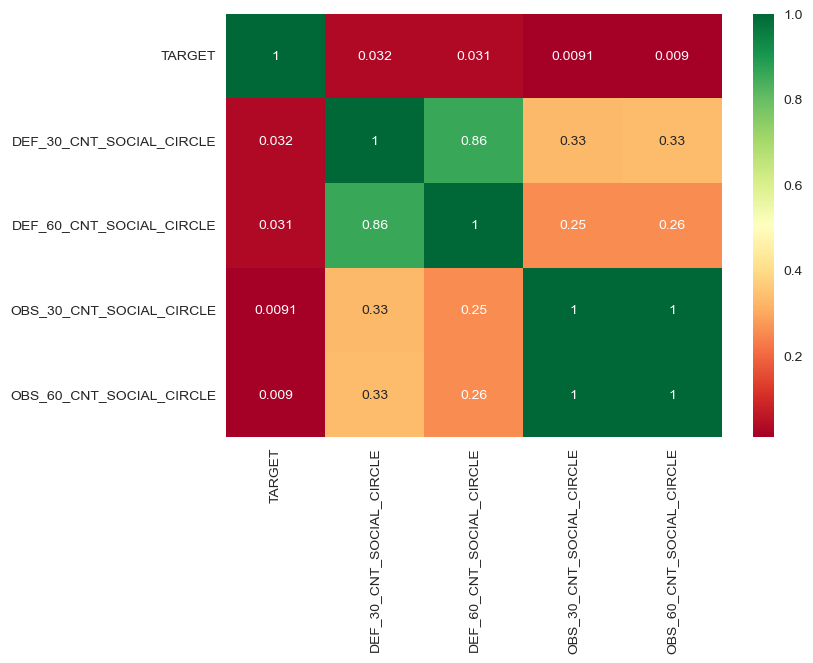

In [424]:
# Analysing column social circle with target column before dropping
res = application_data_revised[['TARGET','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                                'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].corr()
sns.heatmap(res,annot=True,cmap='RdYlGn')

In [425]:
# I dont see any correlation with Target , so its better to drop the columns
# But it is also important to understand client social circlle so DEF_60_CNT_SOCIAL_CIRCLE has relatively higher 
# correlation with Target, hence keeping DEF_60_CNT_SOCIAL_CIRCLE and dropping others
application_data_revised.drop(application_data_revised.iloc[:,27:30],axis=1,inplace=True)

In [426]:
application_data_revised.shape

(307511, 32)

In [427]:
# Final Columns which are relvant for analysis
application_data_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

### previous_application.csv 
contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [428]:
prev_application.shape

(1670214, 37)

In [429]:
# Checking duplicate values
prev_application[prev_application.duplicated()]

#No dulicate rows found. 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


In [430]:
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [431]:
# Will be considering SK_ID_CURR,NAME_CONTRACT_STATUS,CODE_REJECT_REASON and NAME_CLIENT_TYPE from prev dataset, 
# becuase the intention is to get the history of loan status and then will compare with the current client dataset. 
prev_application_revised = prev_application[['SK_ID_CURR','NAME_CONTRACT_STATUS',
                          'CODE_REJECT_REASON','NAME_CLIENT_TYPE']]

In [432]:
# Duplicated rows based on SK_ID_CURR
prev_application_revised[prev_application_revised.duplicated('SK_ID_CURR')]

,SK_ID_CURR,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE
23,302212,Refused,HC,Repeater
115,101529,Canceled,XAP,Repeater
180,405785,Approved,XAP,Repeater
217,203250,Approved,XAP,Repeater
262,163961,Approved,XAP,Refreshed
...,...,...,...,...
1670209,352015,Approved,XAP,Refreshed
1670210,334635,Approved,XAP,New
1670211,249544,Approved,XAP,Repeater
1670212,400317,Approved,XAP,Repeater


In [433]:
application_data_revised[application_data_revised['SK_ID_CURR'] == 101529]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,CONTACT_INFO,DOCUMENT_PROVIDED,EXT_SOURCE
1300,101529,0,Cash loans,F,N,Y,0,225000.0,1288350.0,37800.0,...,NaN,2.0,3,3,XNA,0.0,-387.0,1,1,17


In [434]:
prev_application_revised[prev_application_revised.SK_ID_CURR == 101529]
# Means that the same client and submitted for loan application multiple times

,SK_ID_CURR,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE
114,101529,Refused,HC,Repeater
115,101529,Canceled,XAP,Repeater
156942,101529,Refused,HC,Repeater
192105,101529,Refused,HC,Repeater
251057,101529,Canceled,XAP,Repeater
771406,101529,Refused,HC,Repeater
854681,101529,Refused,HC,Repeater
1502518,101529,Approved,XAP,New
1613552,101529,Refused,HC,Repeater


In [435]:
# I want to join with application_data_revised df, thats the reason duplicates are removed else the rows after 
# joining will be increased.
#prev_application_revised = prev_application_revised.drop_duplicates('SK_ID_CURR')

In [436]:
prev_application_revised.shape

(1670214, 4)

In [437]:
application_data_revised.shape

(307511, 32)

<h2 align="left"> <font color='brown'>Join two datasets</font></h2>

- prev_application_revised
- application_data_revised

In [514]:
# Performing inner join
loan_risk_analysis = application_data_revised.merge(prev_application_revised,how='inner',on='SK_ID_CURR')

In [515]:
loan_risk_analysis.shape

(1413701, 35)

In [516]:
loan_risk_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413701 non-null  object 
 3   CODE_GENDER                  1413701 non-null  object 
 4   FLAG_OWN_CAR                 1413701 non-null  object 
 5   FLAG_OWN_REALTY              1413701 non-null  object 
 6   CNT_CHILDREN                 1413701 non-null  int64  
 7   AMT_INCOME_TOTAL             1413701 non-null  float64
 8   AMT_CREDIT                   1413701 non-null  float64
 9   AMT_ANNUITY                  1413608 non-null  float64
 10  AMT_GOODS_PRICE              1412493 non-null  float64
 11  NAME_INCOME_TYPE             1413701 non-null  object 
 12  NAME_EDUCATION_TYPE          1413701 non-n

<h2 align="left"> <font color='brown'>Impute/Remove missing values</font></h2>

In [517]:
# Find the sum of all the null values
loan_risk_analysis.isna().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        93
AMT_GOODS_PRICE                  1208
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    937206
FLAG_CONT_MOBILE                    0
OCCUPATION_TYPE                457580
CNT_FAM_MEMBERS                     0
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
ORGANIZATION

In [518]:
loan_risk_analysis.shape

(1413701, 35)

###### AMT_GOODS_PRICE 

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    Dropping AMT_GOODS_PRICE since the original dataset does not include information about the sort of loan the 
    client has taken.Mssing the AMT_GOODS_PRICE value does not offer definite information about whether the client has taken out a loan in addition to purchasing goods.
</div>

In [519]:
loan_risk_analysis.drop('AMT_GOODS_PRICE',axis=1,inplace=True)

##### OWN_CAR_AGE

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    Missing value in OWN_CAR_AGE is for those clients who are not owning a car. This is expected
</div>

In [520]:
loan_risk_analysis[['FLAG_OWN_CAR','OWN_CAR_AGE']].head()

,FLAG_OWN_CAR,OWN_CAR_AGE
0,N,NaN
1,N,NaN
2,N,NaN
3,N,NaN
4,Y,26.0


##### OCCUPATION_TYPE and ORGANIZATION_TYPE

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    <li> 32% of Occupation type has missing value in NaN. Will convert it to a different category.</li>
    <li> Organisation type missing value is XNA, will convert it to a different category.</li>
    <li> Drop those values because 31% values are missing. </li>
</div>

In [521]:
tmp_df = loan_risk_analysis[loan_risk_analysis.OCCUPATION_TYPE.isnull()].head(10)
tmp_df[['TARGET','OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_CONTRACT_STATUS','AMT_INCOME_TOTAL','NAME_CLIENT_TYPE',]]

,TARGET,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_STATUS,AMT_INCOME_TOTAL,NAME_CLIENT_TYPE
33,0,NaN,XNA,Refused,112500.000,Repeater
34,0,NaN,XNA,Approved,112500.000,New
35,0,NaN,XNA,Approved,112500.000,Repeater
36,0,NaN,XNA,Approved,112500.000,Repeater
43,0,NaN,XNA,Approved,38419.155,New
79,0,NaN,XNA,Refused,83250.000,Repeater
80,0,NaN,XNA,Approved,83250.000,New
81,0,NaN,XNA,Approved,83250.000,Repeater
82,0,NaN,XNA,Canceled,83250.000,Repeater
97,0,NaN,Military,Approved,270000.000,New


In [522]:
count_missing_occType = loan_risk_analysis.OCCUPATION_TYPE.isnull().sum()
total_values = loan_risk_analysis.shape[0]
percentage = (count_missing_occType/total_values)*100
percentage

32.36752325986895

In [523]:
loan_risk_analysis.loc[loan_risk_analysis.ORGANIZATION_TYPE == 'XNA','ORGANIZATION_TYPE'] = 'Unknown'
loan_risk_analysis.OCCUPATION_TYPE.fillna('Unknown',inplace=True)

In [524]:
loan_risk_analysis = loan_risk_analysis.drop(loan_risk_analysis[loan_risk_analysis['OCCUPATION_TYPE'] 
                                                                == 'Unknown'].index)

##### AMT_ANNUITY

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    Percentage of missing annuity is very less, so we can drop the values
</div>


In [525]:
loan_risk_analysis.AMT_ANNUITY.describe()
tmp_df = loan_risk_analysis[loan_risk_analysis.AMT_ANNUITY.isnull()].head(5)
tmp_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,CONTACT_INFO,DOCUMENT_PROVIDED,EXT_SOURCE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE
217466,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,2,Business Entity Type 3,0.0,-2.0,1,1,15,Approved,XAP,Repeater
217467,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,2,Business Entity Type 3,0.0,-2.0,1,1,15,Approved,XAP,New
217468,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,2,Business Entity Type 3,0.0,-2.0,1,1,15,Approved,XAP,Repeater
217469,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,2,Business Entity Type 3,0.0,-2.0,1,1,15,Approved,XAP,Repeater
217470,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,2,Business Entity Type 3,0.0,-2.0,1,1,15,Canceled,XAP,Repeater


In [526]:
count_missing_annuity = loan_risk_analysis.AMT_ANNUITY.isnull().sum()
total_values = loan_risk_analysis.shape[0]
percentage_missing_annuity = (count_missing_annuity/total_values)*100
percentage_missing_annuity

0.009726802360789063

In [527]:
# Percentage of missing annuity is very less, so we can drop the values
loan_risk_analysis = loan_risk_analysis[~loan_risk_analysis.AMT_ANNUITY.isnull()]

##### CODE_GENDER

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    Dropped XNA because there is nothing called XNA in geneder
</div>

In [528]:
loan_risk_analysis = loan_risk_analysis.drop(loan_risk_analysis[loan_risk_analysis['CODE_GENDER'] 
                                                                == 'XNA'].index)

<h2 align="left"> <font color='brown'>Standardize Values</font></h2>

##### DAYS_BIRTH & DAYS_EMPLOYED 
 - It contains negative value

In [529]:
loan_risk_analysis.DAYS_BIRTH = loan_risk_analysis.DAYS_BIRTH.apply(lambda x:abs(x)/365)
loan_risk_analysis.DAYS_EMPLOYED = loan_risk_analysis.DAYS_EMPLOYED.apply(lambda x : abs(x)/365)

In [530]:
# Created new columns. Performed deep copy
loan_risk_analysis['AGE'] = loan_risk_analysis.DAYS_BIRTH.copy()
loan_risk_analysis['Experience'] = loan_risk_analysis.DAYS_EMPLOYED.copy()

<h2 align="left"> <font color='brown'>Outliers</font></h2>

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    <li> Outlier is present in credit ammount</li>
    <li> Outlier is present in credit ammount</li>
    <li> Outlier is not present in annuity ammount</li>
    <li> Outlier is not presnet in in Age</li>
    <li> Outlier is present in experience</li>
</div>

##### AMT_INCOME_TOTAL, AMT_CREDIT and AMT_ANNUITY

In [531]:
# Here mean is highly shifted, due to outlier
(loan_risk_analysis['AMT_INCOME_TOTAL']/100000).describe()

count    955999.000000
mean          1.797996
std           2.287948
min           0.256500
25%           1.125000
50%           1.575000
75%           2.250000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

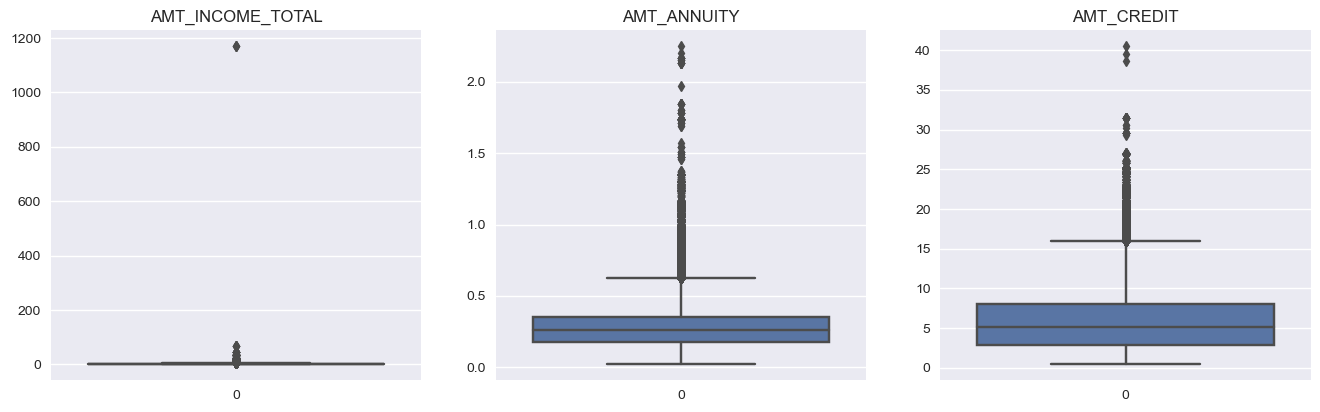

In [535]:
#Converting the values to the range of 100K, like changing the value from 100000 to 100 K. 
#This will help to comprehend the figures easily.

plt.figure(figsize=(22,10))
plt.subplot(2,4,1)
plt.title('AMT_INCOME_TOTAL')
sns.boxplot(loan_risk_analysis['AMT_INCOME_TOTAL']/100000)
plt.subplot(2,4,2)
plt.title('AMT_ANNUITY')
sns.boxplot(loan_risk_analysis['AMT_ANNUITY']/100000)
plt.subplot(2,4,3)
plt.title('AMT_CREDIT')
sns.boxplot(loan_risk_analysis['AMT_CREDIT']/100000)
plt.show()

<Axes: ylabel='Frequency'>

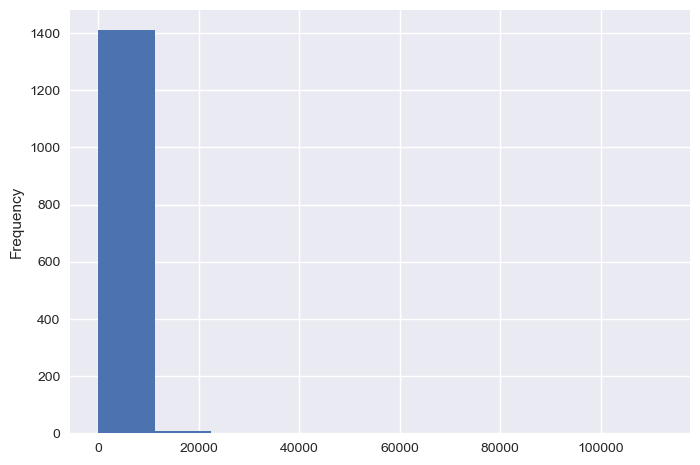

In [536]:
loan_risk_analysis.AMT_INCOME_TOTAL.value_counts().plot.hist()

In [537]:
# AMT_INCOME_TOTAL has huge outliers. Better to create bins till 400 K because abaove 400 K the data are very less.
# Max is reaching over e+08 means is over milloin, creating bin of 100K each will be good
loan_risk_analysis.AMT_INCOME_TOTAL = loan_risk_analysis['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5]
bucktes = ['0-100K','100K-200K', '200k-300k',
        '300k-400k','400k Above']
loan_risk_analysis['AMT_INCOME_RANGE'] = pd.cut(loan_risk_analysis.AMT_INCOME_TOTAL,bins,labels=bucktes)

In [538]:
loan_risk_analysis.AMT_INCOME_RANGE.value_counts(normalize=True)*100

100K-200K     51.911749
200k-300k     25.408952
0-100K        14.895754
300k-400k      5.838977
400k Above     1.944567
Name: AMT_INCOME_RANGE, dtype: float64

<Axes: >

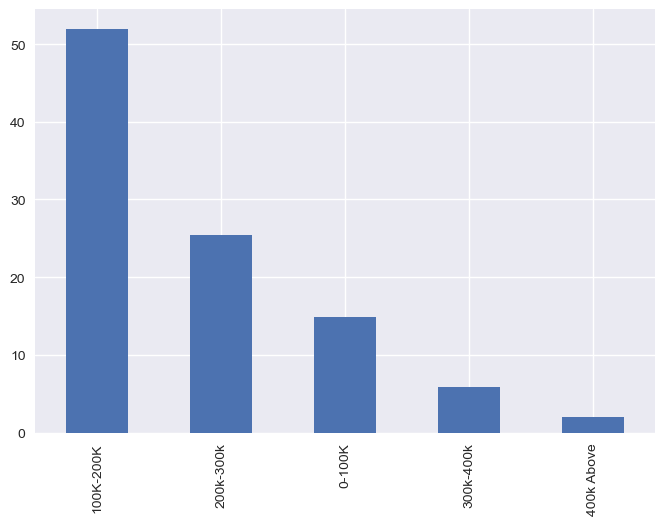

In [539]:
round(loan_risk_analysis.AMT_INCOME_RANGE.value_counts(normalize=True)*100,2).plot.bar()

In [540]:
# AMT_CREDIT has some outliers.
loan_risk_analysis.AMT_CREDIT = loan_risk_analysis['AMT_CREDIT']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10]
bucktes = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k Above']
loan_risk_analysis['AMT_CREDIT_RANGE'] = pd.cut(loan_risk_analysis.AMT_CREDIT,bins,labels=bucktes)

In [541]:
loan_risk_analysis.AMT_CREDIT_RANGE.value_counts(normalize=True)*100

200k-300k     19.966485
500k-600k     13.570531
400k-500k     13.478277
300k-400k     10.890787
100K-200K     10.664446
600k-700k      9.433387
800k-900k      8.441493
700k-800k      7.564139
900k Above     3.687574
0-100K         2.302882
Name: AMT_CREDIT_RANGE, dtype: float64

##### AGE and Experience 

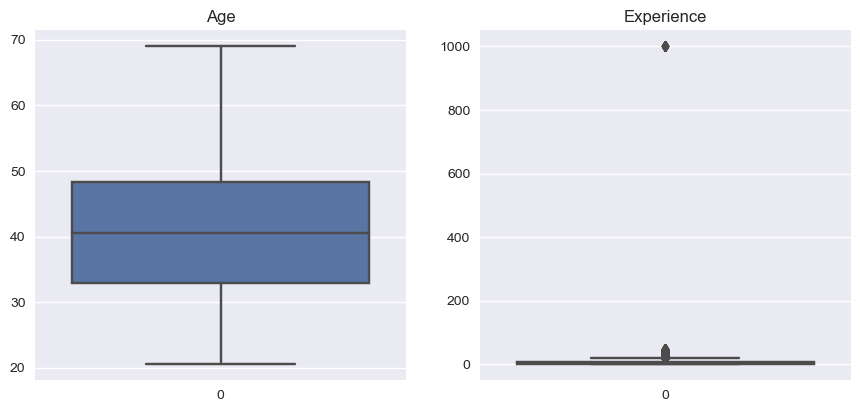

In [542]:
plt.figure(figsize=(22,10))
plt.subplot(2,4,1)
plt.title('Age')
sns.boxplot(loan_risk_analysis.AGE)
plt.subplot(2,4,2)
plt.title('Experience')
sns.boxplot(loan_risk_analysis.Experience)
plt.show()

In [543]:
# Days Employed has outliers. The maax value of employment is 1000 years which is not possible. Need to exclude. 
loan_risk_analysis.Experience.describe()

count    955999.000000
mean          6.718621
std           7.723089
min           0.000000
25%           2.306849
50%           4.786301
75%           8.876712
max        1000.665753
Name: Experience, dtype: float64

In [544]:
bins=[0,10,20,30,40,50,100]
buckets=['0-10','10-20','20-30','30-40','40-50','50-above']
loan_risk_analysis['Experience_Range'] = pd.cut(loan_risk_analysis.Experience,bins,labels=buckets)

In [545]:
loan_risk_analysis.Experience_Range.value_counts(normalize=True)*100

0-10        79.408457
10-20       15.705327
20-30        3.716938
30-40        1.084338
40-50        0.084939
50-above     0.000000
Name: Experience_Range, dtype: float64

<h2 align="left"> <font color='brown'>Data Analysis</font></h2>

In [498]:
loan_risk_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955999 entries, 0 to 1413700
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   955999 non-null  int64   
 1   TARGET                       955999 non-null  int64   
 2   NAME_CONTRACT_TYPE           955999 non-null  object  
 3   CODE_GENDER                  955999 non-null  object  
 4   FLAG_OWN_CAR                 955999 non-null  object  
 5   FLAG_OWN_REALTY              955999 non-null  object  
 6   CNT_CHILDREN                 955999 non-null  int64   
 7   AMT_INCOME_TOTAL             955999 non-null  float64 
 8   AMT_CREDIT                   955999 non-null  float64 
 9   AMT_ANNUITY                  955999 non-null  float64 
 10  NAME_INCOME_TYPE             955999 non-null  object  
 11  NAME_EDUCATION_TYPE          955999 non-null  object  
 12  NAME_FAMILY_STATUS           955999 non-nul

### Duplicates
- There are many duplicated SK_ID_CURR

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    <li>Presence of duplicate SK_ID_CURR is legitimate which implies that same applicant and applied for loan multiple times. </li>
    <li> ~78 % of clients have submitted more than one time for 50 % of the data. 
</div>

In [499]:
loan_risk_analysis[loan_risk_analysis.duplicated('SK_ID_CURR')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DOCUMENT_PROVIDED,EXT_SOURCE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,AGE,Experience,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,Experience_Range
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,1,12,Approved,XAP,Refreshed,45.931507,3.254795,200k-300k,NaN,0-10
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,1,12,Approved,XAP,Refreshed,45.931507,3.254795,200k-300k,NaN,0-10
6,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,...,1,19,Canceled,XAP,Repeater,52.068493,8.326027,100K-200K,300k-400k,0-10
7,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,...,1,19,Approved,XAP,Repeater,52.068493,8.326027,100K-200K,300k-400k,0-10
8,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,...,1,19,Approved,XAP,Repeater,52.068493,8.326027,100K-200K,300k-400k,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,...,1,21,Approved,XAP,Repeater,46.180822,3.457534,100K-200K,600k-700k,0-10
1413697,456255,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,...,1,21,Refused,HC,Repeater,46.180822,3.457534,100K-200K,600k-700k,0-10
1413698,456255,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,...,1,21,Refused,HC,Repeater,46.180822,3.457534,100K-200K,600k-700k,0-10
1413699,456255,0,Cash loans,F,N,N,0,1.575,6.750000,49117.5,...,1,21,Approved,XAP,Repeater,46.180822,3.457534,100K-200K,600k-700k,0-10


In [500]:
repeat_ID = loan_risk_analysis['SK_ID_CURR'].value_counts().reset_index()
repeat_ID

,index,SK_ID_CURR
0,265681,73
1,173680,72
2,198355,63
3,345161,62
4,446486,62
...,...,...
199798,400279,1
199799,132487,1
199800,264684,1
199801,264686,1


In [501]:
# Top 50 % for unique SK_ID_CURR
repeat_ID.head(int(199817/2))
percentage = (repeat_ID.head(int(199817/2)).sum()/repeat_ID.head(int(199817)).sum())*100
percentage

index         50.336138
SK_ID_CURR    78.976547
dtype: float64

### Univariate Analysis

In [502]:
# User defined function Used for visualisation

#Bar graph 

def bar_plot(feature_name,plot_title,x_lablel,y_lablel):
    res = round (loan_risk_analysis[feature_name].value_counts(normalize=True)*100,2)
    res.plot.bar()
    
    # Adding and formatting title
    plt.title(plot_title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})
    
    # Labeling Axes
    plt.xlabel(x_lablel, fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
    plt.ylabel(y_lablel, fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
    plt.show()


###### Target

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
       <li> Target has two values - 0 (clients without payment difficulties) and 1 (with payment difficulties)</li>
    <li> 0 has been designated as Non-Default and 1 has been designated as Default</li>
    <li> Data is highly imbalanced because the percentage of Non-Default is 90.5 % and Default is 9.5 %
           
</div>

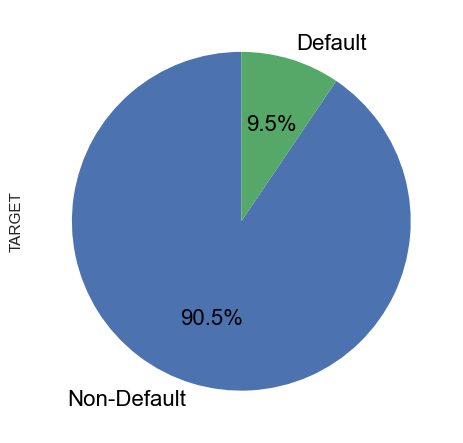

In [503]:
# Target
target = round(loan_risk_analysis.TARGET.value_counts(normalize=True)*100,2)
x = ['Non-Default','Default']
target.plot.pie(labels=x,autopct='%1.1f%%',
                textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)
plt.show()

##### AMT_INCOME_RANGE

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    <li> 52 % of aplicants earn between the range of 100K-200K</li>
    <li> Roughly 2 % of clients are highly paid.</li>
    <li> Mean income - 189533.2 </li>
    
           
</div>

In [546]:
loan_risk_analysis.AMT_INCOME_RANGE.value_counts(normalize=True)*100

100K-200K     51.911749
200k-300k     25.408952
0-100K        14.895754
300k-400k      5.838977
400k Above     1.944567
Name: AMT_INCOME_RANGE, dtype: float64

In [551]:
income = loan_risk_analysis.AMT_INCOME_RANGE.value_counts().reset_index()

total_income = income.AMT_INCOME_RANGE.sum()

mean_income = total_income/5

mean_income

189533.2

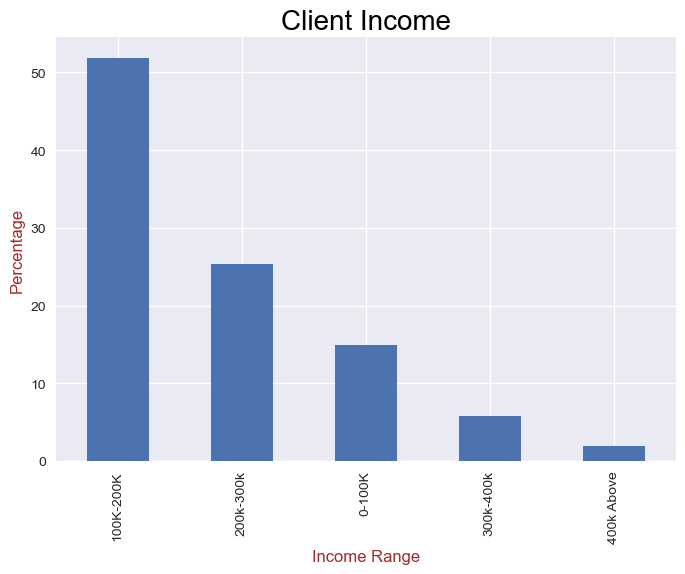

In [504]:
bar_plot('AMT_INCOME_RANGE',"Client Income",'Income Range','Percentage')

##### NAME_CONTRACT_STATUS

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    <li> Approved(Loan approved by bank) - 63%</li>
    <li> Cancelled(Client cancelled the application) - 18% </li>
    <li> Refused(Loan got rejected) - 18% </li>
    <li> Unused Offer(Client cancelled the loan during diff stages of the process) - 2% 
</div>

In [552]:
loan_risk_analysis.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.816279
Canceled        17.684642
Refused         17.661106
Unused offer     1.837973
Name: NAME_CONTRACT_STATUS, dtype: float64

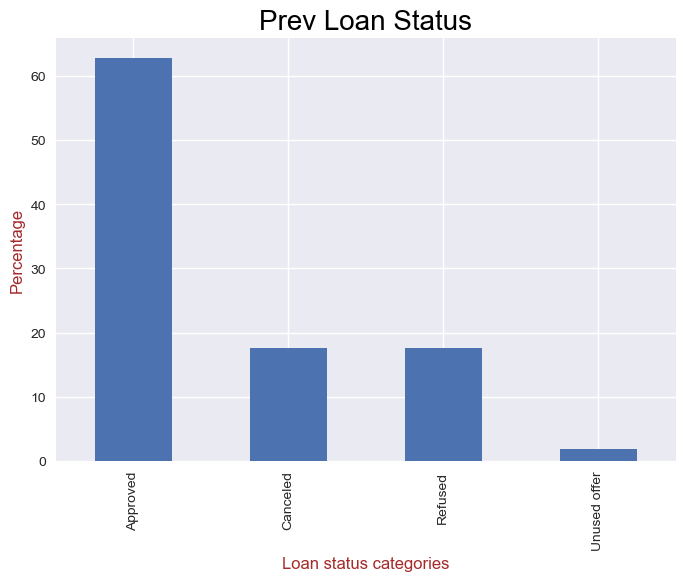

In [372]:
bar_plot('NAME_CONTRACT_STATUS',"Prev Loan Status",'Loan status categories','Percentage')

#### AGE

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    <li> Client between age group between 30-50 is more </li>
    <li> Senior citizen (60-70) -  less than 50,000 </li>
</div>

In [553]:
loan_risk_analysis.AGE.value_counts()

38.690411    205
36.931507    201
31.394521    199
38.263014    193
48.967123    192
            ... 
64.463014      1
67.715068      1
66.608219      1
64.238356      1
66.627397      1
Name: AGE, Length: 16237, dtype: int64

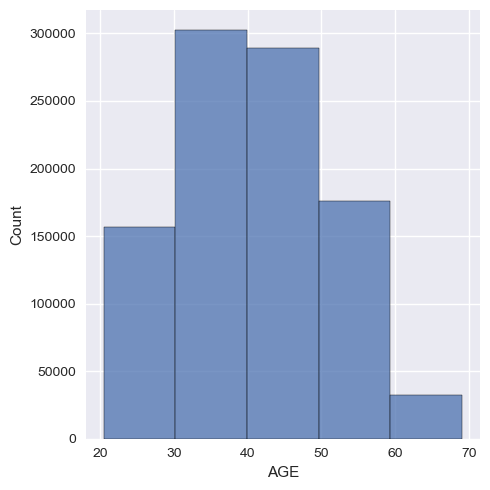

In [373]:
sns.displot(loan_risk_analysis.AGE,bins=5)

##### REGION_RATING_CLIENT

<div class="alert alert-block alert-info">
<b>Assumption</b>
    <br><br>
    <li> Rating 1 is tier 1 city </li>
    <li> Rating 2 is tier 2 city </li>
    <li> Rating 3 is tier 3 city </li>

<b>Takeaway</b>
    <br><br>
    <li> The proportion of clients seeking for loans from tier 2 cities is approximately 75%.  </li>
    <li> Clients from Tier 1 cities do not apply for loans in large numbers. </li>
</div>

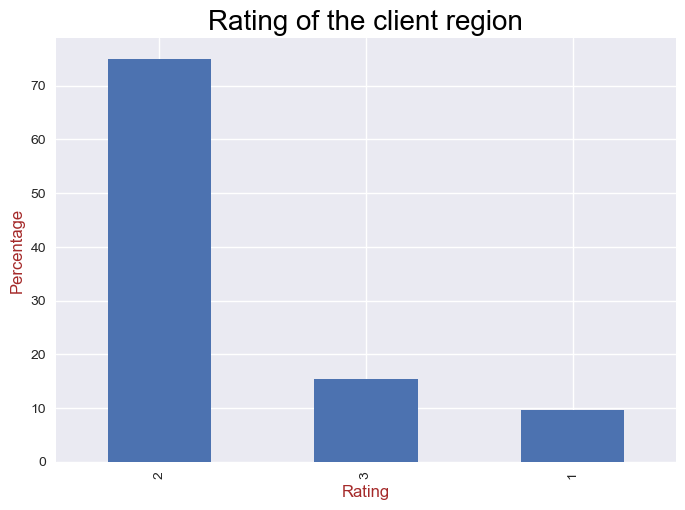

In [556]:
bar_plot('REGION_RATING_CLIENT','Rating of the client region',"Rating",'Percentage')

### Bivariate and Multivariate

In [563]:
# User defined function Used for visualisation

#Count Plot

def count_plot(feature_name,hue,plot_title,x_lablel,y_lablel):
    chart = (sns.countplot(x=loan_risk_analysis[feature_name],hue=hue))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    
    # Adding and formatting title
    plt.title(plot_title, fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})
    
    # Labeling Axes
    plt.xlabel(x_lablel, fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
    plt.ylabel(y_lablel, fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
    plt.show()

# Heat Map 
def heat_map(data,index,column,value,center):
    res = pd.pivot_table(data=data,index=index,columns=column,values=value)
    sns.heatmap(res,annot=True,cmap='RdYlGn',center=center)
    plt.show()

<h2 align="left"> <font color='Blue'>Applicant's History</font></h2>

 - In order to understand the history of the application. Analysis between following has to be performed **NAME_CONTRACT_STATUS**, **NAME_CLIENT_TYPE** and **TARGET**
 
 
 <div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    <li> ~ 87% of clinet whoes previous loan got rejected are able to pay in the current application.   </li>
    <li> Loans got approved for most of the clients who are repeat customers. Bank should consider more on the repeat clients.</li>
    <li> Applicants history like repeat customers and prev approved users are most likely to get loans approved for current application</li>
</div>

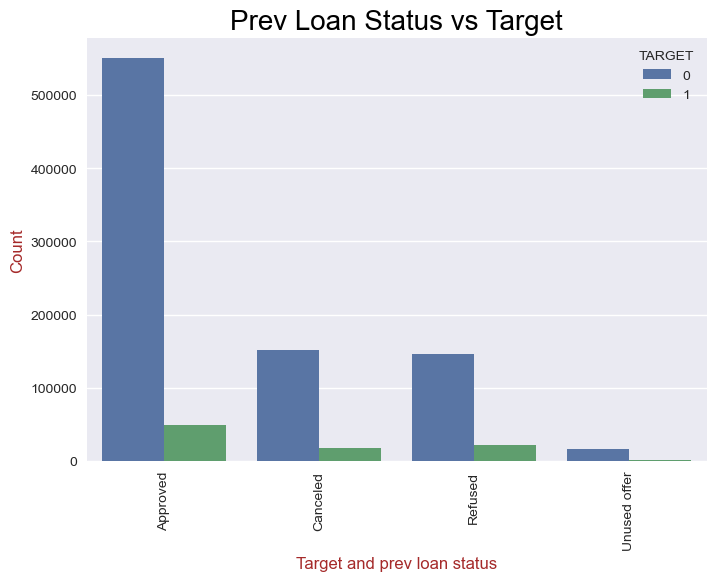

In [557]:
# Client status analysis
count_plot('NAME_CONTRACT_STATUS',loan_risk_analysis.TARGET,'Prev Loan Status vs Target',
           'Target and prev loan status','Count')

In [561]:
# Client status analysis
res = loan_risk_analysis.groupby("NAME_CONTRACT_STATUS")["TARGET"]
res.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS  TARGET
Approved              0         91.753355
                      1          8.246645
Canceled              0         89.654275
                      1         10.345725
Refused               0         86.994196
                      1         13.005804
Unused offer          0         91.389221
                      1          8.610779
Name: TARGET, dtype: float64

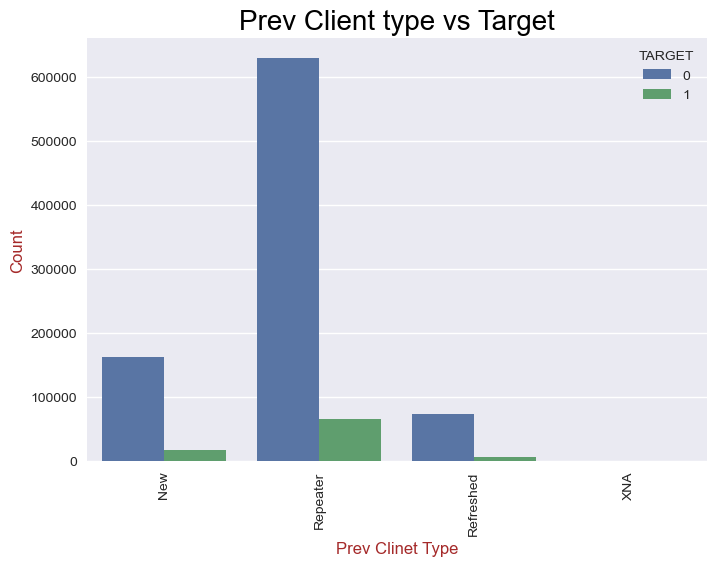

In [568]:
# Client type analysis
count_plot('NAME_CLIENT_TYPE',loan_risk_analysis.TARGET,'Prev Client type vs Target',
           'Prev Clinet Type','Count')

<h2 align="left"> <font color='Blue'>Applicant's Income</font></h2>

In order to understand the history of the application. Analysis between following has to be performed
- AMT_INCOME_RANGE
- AMT_CREDIT_RANGE
- NAME_INCOME_TYPE

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    <li> High income clients are most likely to get loans approved.  </li>
    <li> ~92% of the clients earn in the income range of 100K to 300K.</li>
    <li> For low income clients there are ~10% chance the loan will be rejected.</li>
    <li> Clients falling under the credit range of 200K to 300K are likely to get the loans approved.</li>
    <li> High correlation between high income range and low credit range.</li>
    <li> High chance of loan accpetance for working class client than non working class client due to low income.</li>
</div>

In [379]:
loan_risk_analysis.AMT_INCOME_RANGE.value_counts()

100K-200K     491950
200k-300k     240792
0-100K        141162
300k-400k      55334
400k Above     18428
Name: AMT_INCOME_RANGE, dtype: int64

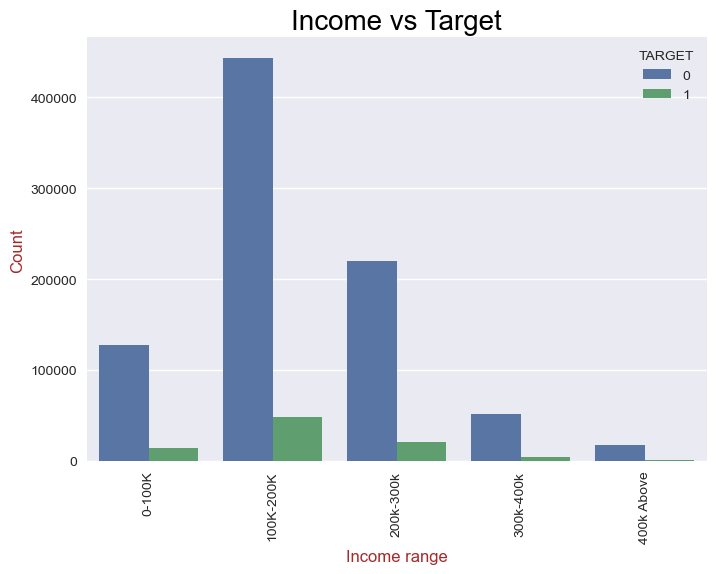

In [592]:
count_plot('AMT_INCOME_RANGE',loan_risk_analysis.TARGET,'Income vs Target',
           'Income range','Count')

In [567]:
res = loan_risk_analysis.groupby('AMT_INCOME_RANGE')['TARGET']
res.value_counts(normalize=True)*100

AMT_INCOME_RANGE  TARGET
0-100K            0         89.948428
                  1         10.051572
100K-200K         0         90.119321
                  1          9.880679
200k-300k         0         91.115569
                  1          8.884431
300k-400k         0         92.397080
                  1          7.602920
400k Above        0         92.316041
                  1          7.683959
Name: TARGET, dtype: float64

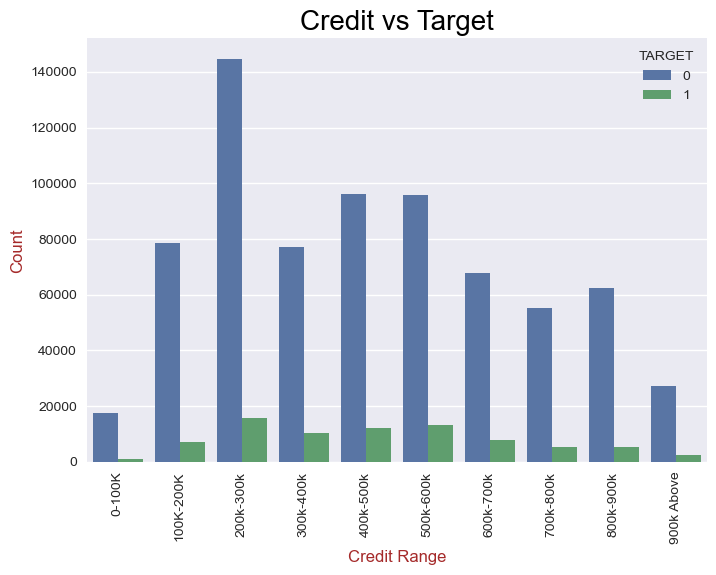

In [570]:
#chart = (sns.countplot(x=loan_risk_analysis['AMT_CREDIT_RANGE'],hue=loan_risk_analysis.TARGET))
count_plot('AMT_CREDIT_RANGE',loan_risk_analysis.TARGET,'Credit vs Target',
           'Credit Range','Count')

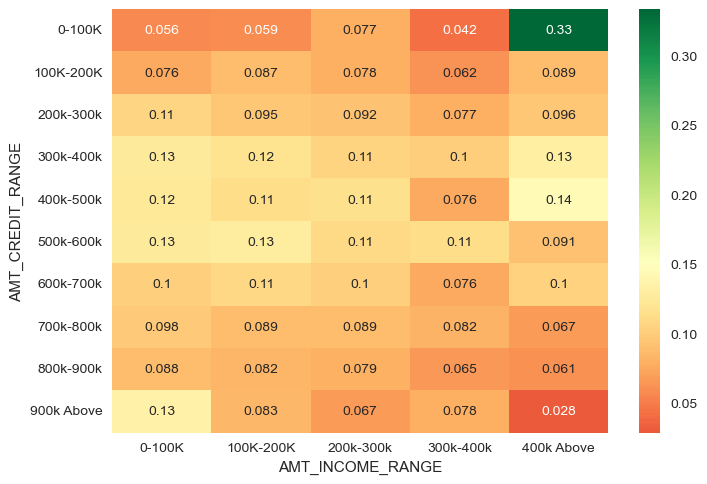

In [573]:
heat_map(loan_risk_analysis,'AMT_CREDIT_RANGE','AMT_INCOME_RANGE','TARGET',0.15)

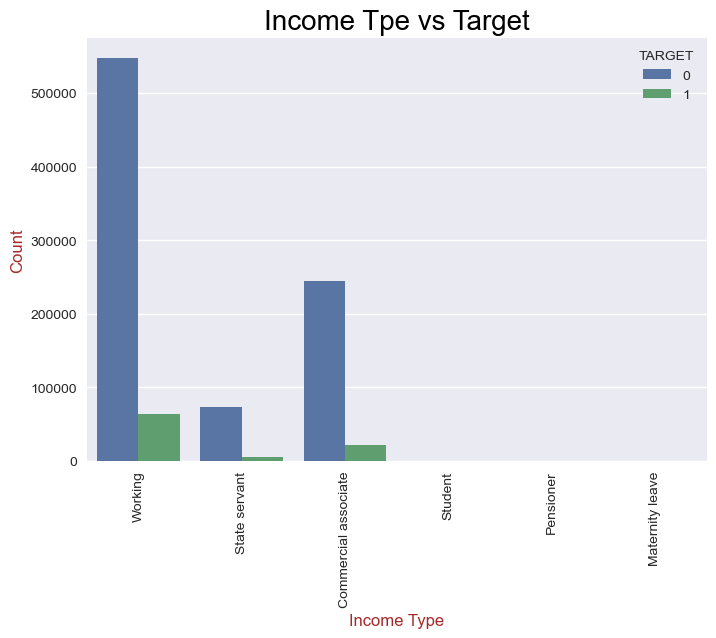

In [582]:
#Income type
count_plot('NAME_INCOME_TYPE',loan_risk_analysis.TARGET,'Income Tpe vs Target',
           'Income Type','Count')

In [584]:
loan_risk_analysis.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts(normalize=True)*100

NAME_INCOME_TYPE      TARGET
Commercial associate  0          91.737040
                      1           8.262960
Maternity leave       1         100.000000
Pensioner             0         100.000000
State servant         0          93.563221
                      1           6.436779
Student               0         100.000000
Working               0          89.624971
                      1          10.375029
Name: TARGET, dtype: float64

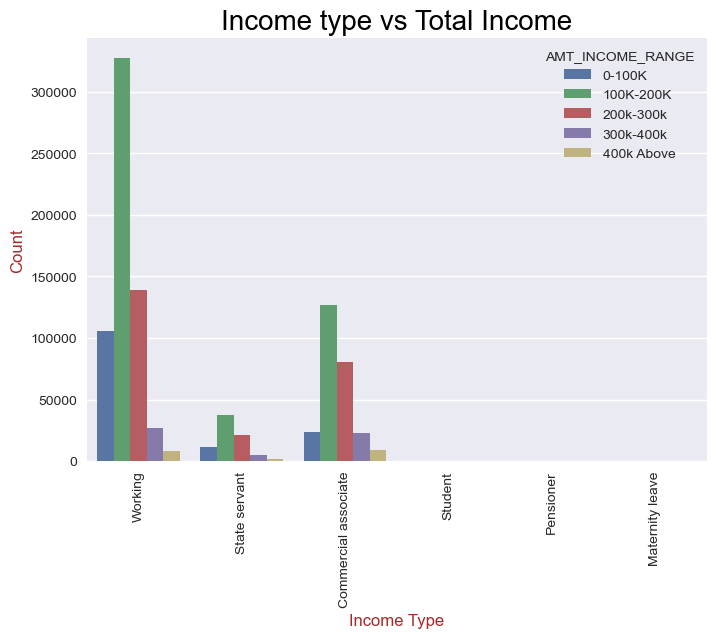

In [585]:
count_plot('NAME_INCOME_TYPE',loan_risk_analysis.AMT_INCOME_RANGE,'Income type vs Total Income',
           'Income Type','Count')

<h2 align="left"> <font color='Blue'>Applicant Status</font></h2>

- In order to understand the status or about the applicant. Analysis between following has to be performed FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, CODE_GENDER, NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CNT_FAM_MEMBERS


<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    <li> Chances to get loan </li>
    <ul>Female more than Male</ul>
    <ul>Low children count</ul>
    <ul>Own a house</ul>
    <ul> No car</ul>
    <ul> Moderate family member size</ul>    
</div>

In [386]:
def subplot(features):
    for i in range(0,len(features)):
        #print(features[i])
        plt.subplot(2, 2,i+1)
        chart = (sns.countplot(x=loan_risk_analysis[features[i]],hue=loan_risk_analysis.TARGET))
        
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        
         # Adding and formatting title
         #plt.title(features[i], fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})
    
        # Labeling Axes
        plt.xlabel(features[i], fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
        plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
        plt.show()
        

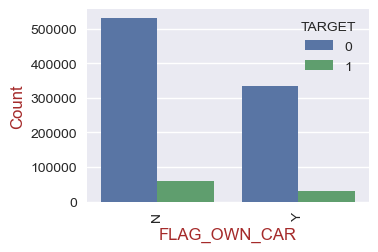

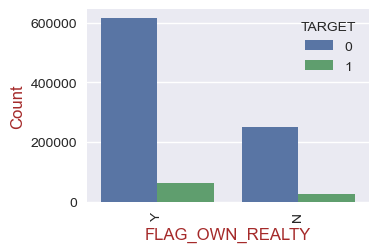

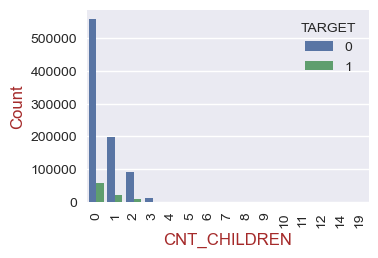

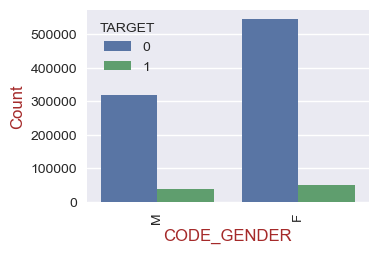

In [387]:
features = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','CODE_GENDER']
subplot(features)

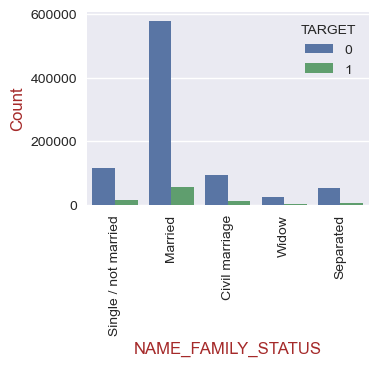

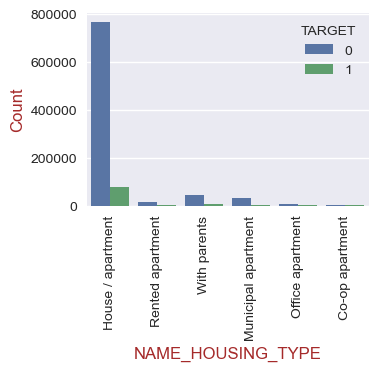

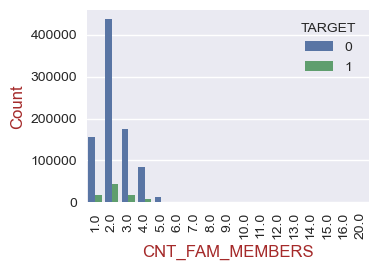

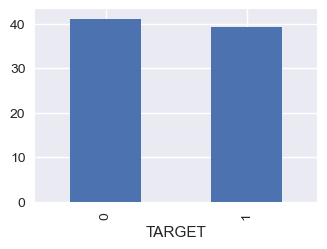

In [586]:
features = ['NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','CNT_FAM_MEMBERS']
subplot(features)

plt.subplot(2, 2, 4)
loan_risk_analysis.groupby('TARGET')['AGE'].mean().plot.bar()
plt.show()

<Axes: >

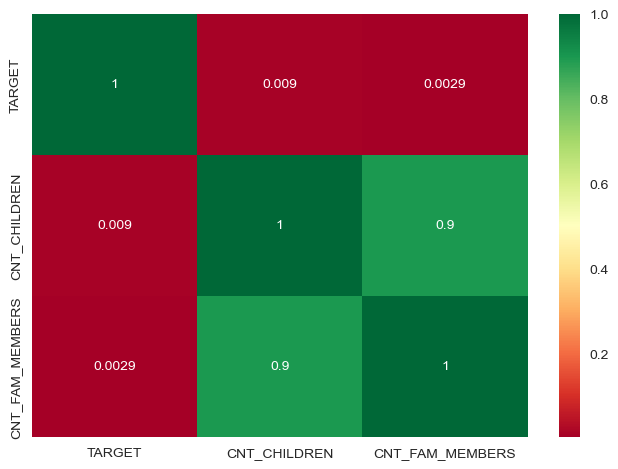

In [389]:
# Good correlation between CNT_FAM_MEMBERS and CNT_CHILDREN
res = loan_risk_analysis[['TARGET','CNT_CHILDREN','CNT_FAM_MEMBERS']].corr()
sns.heatmap(res,annot=True,cmap='RdYlGn')

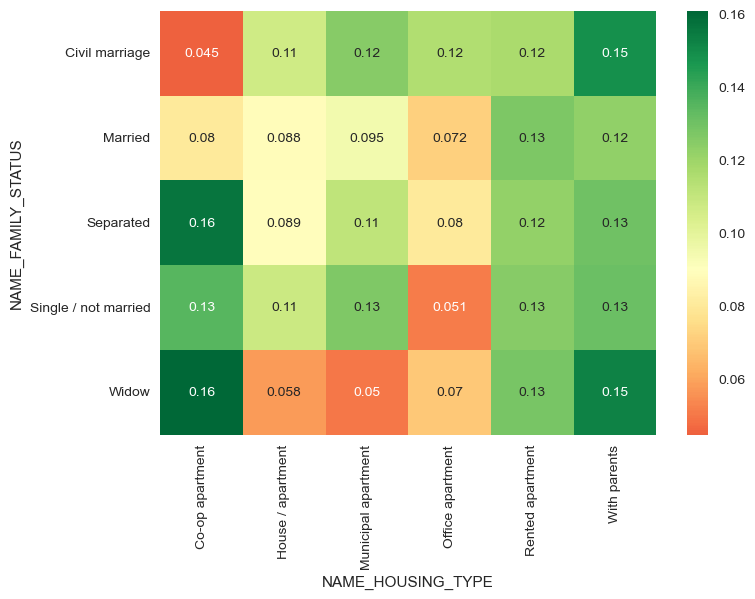

In [391]:
heat_map(loan_risk_analysis,'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','TARGET',0.09)

## Occupation

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    <li>Higher the education good chanches to get a loan.</li>
    <li>Expereince range 0-20 years will be good chance to get a loan.</li>
</div>

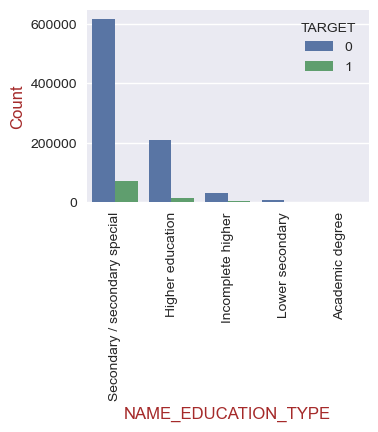

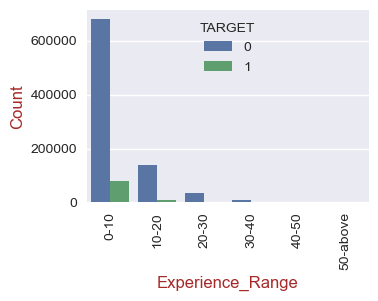

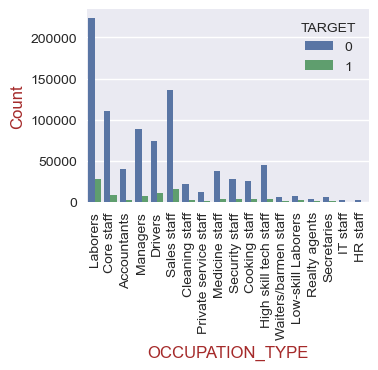

In [392]:
features = ['NAME_EDUCATION_TYPE','Experience_Range','OCCUPATION_TYPE']
subplot(features)

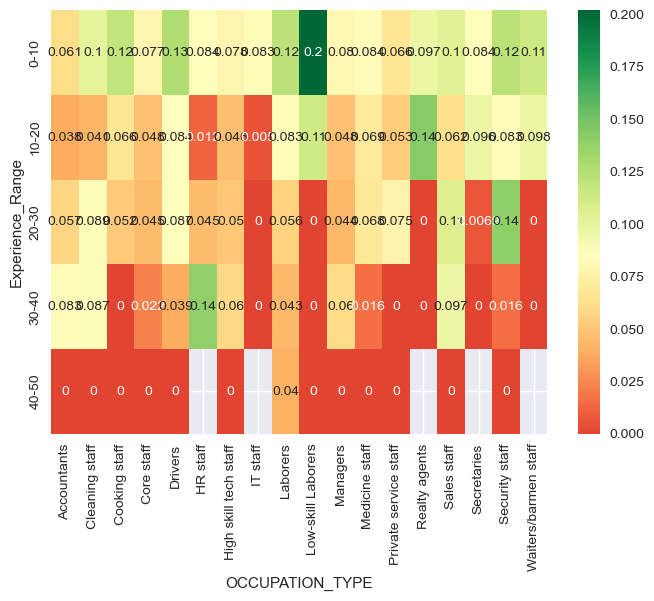

In [393]:
heat_map(loan_risk_analysis,'Experience_Range','OCCUPATION_TYPE','TARGET',0.085)

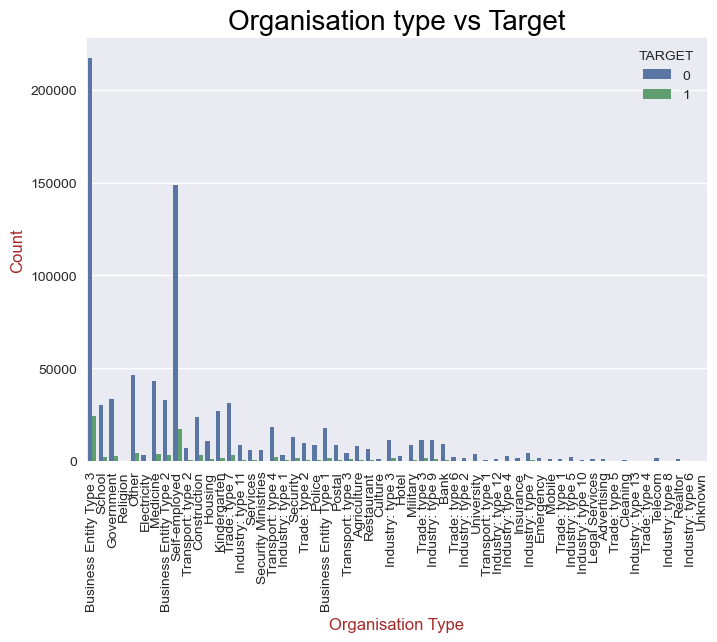

In [394]:
count_plot('ORGANIZATION_TYPE',loan_risk_analysis.TARGET,'Organisation type vs Target','Organisation Type','Count')

## Client's Surroundings
- REGION_RATING_CLIENT
- DEF_60_CNT_SOCIAL_CIRCLE

<div class="alert alert-block alert-info">
<b>Takeaway</b>
    <br><br>
    <li>Less chance to get the loan having bad social surroundings</li>
    <li>1 and 2 rating clients more porne to get loan</li>
    <li>clients with region rating 3 having high chance of loan rejection.</li>
</div>

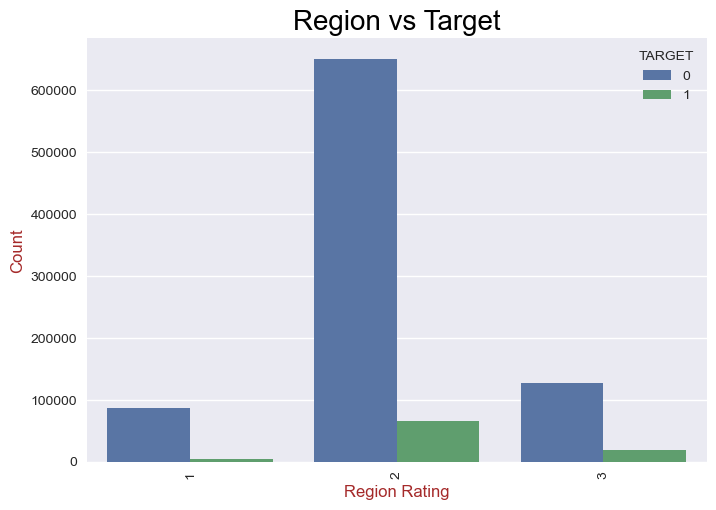

In [395]:
count_plot('REGION_RATING_CLIENT',loan_risk_analysis.TARGET,'Region vs Target','Region Rating','Count')

In [590]:
loan_risk_analysis.groupby('REGION_RATING_CLIENT')['TARGET'].value_counts(normalize=True)*100

REGION_RATING_CLIENT  TARGET
1                     0         94.217012
                      1          5.782988
2                     0         90.794295
                      1          9.205705
3                     0         86.965736
                      1         13.034264
Name: TARGET, dtype: float64

<Axes: xlabel='TARGET'>

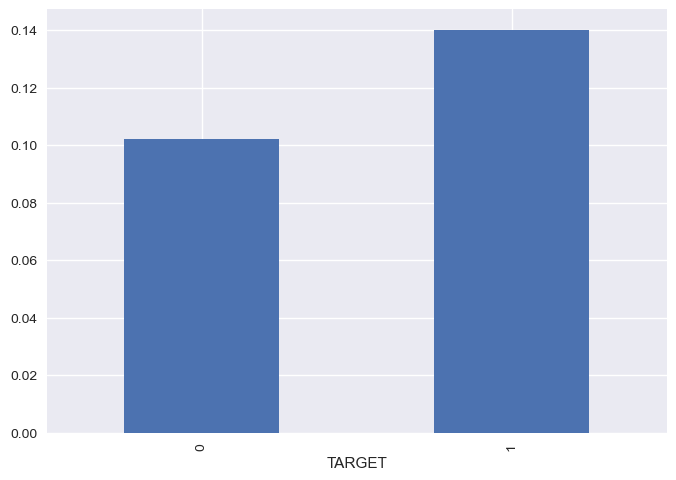

In [397]:
loan_risk_analysis.groupby('TARGET')['DEF_60_CNT_SOCIAL_CIRCLE'].mean().plot.bar()

## Client Discipline
- EXT_SOURCE
- CONTACT_INFO
- DOCUMENT_PROVIDED

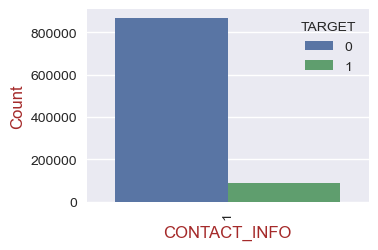

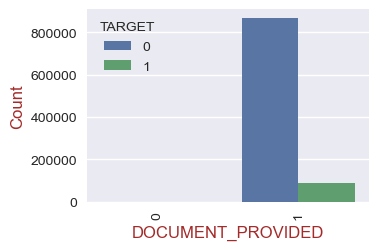

In [398]:
features = ['CONTACT_INFO','DOCUMENT_PROVIDED']
subplot(features)

<Axes: xlabel='TARGET'>

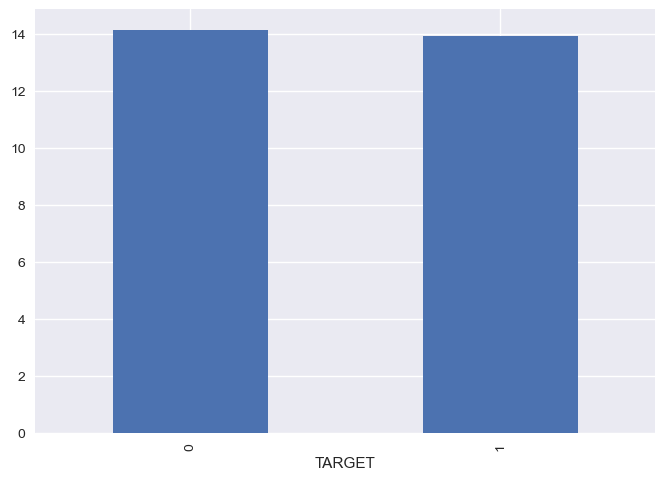

In [399]:
loan_risk_analysis.groupby('TARGET')['EXT_SOURCE'].mean().plot.bar()

## Other Analysis

In [400]:
loan_risk_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955999 entries, 0 to 1413700
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   955999 non-null  int64   
 1   TARGET                       955999 non-null  int64   
 2   NAME_CONTRACT_TYPE           955999 non-null  object  
 3   CODE_GENDER                  955999 non-null  object  
 4   FLAG_OWN_CAR                 955999 non-null  object  
 5   FLAG_OWN_REALTY              955999 non-null  object  
 6   CNT_CHILDREN                 955999 non-null  int64   
 7   AMT_INCOME_TOTAL             955999 non-null  float64 
 8   AMT_CREDIT                   955999 non-null  float64 
 9   AMT_ANNUITY                  955999 non-null  float64 
 10  NAME_INCOME_TYPE             955999 non-null  object  
 11  NAME_EDUCATION_TYPE          955999 non-null  object  
 12  NAME_FAMILY_STATUS           955999 non-nul

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

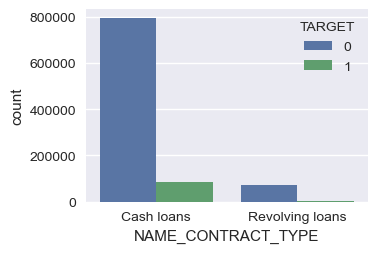

In [401]:
plt.subplot(2, 2, 1)
sns.countplot(x=loan_risk_analysis['NAME_CONTRACT_TYPE'],hue=loan_risk_analysis.TARGET)


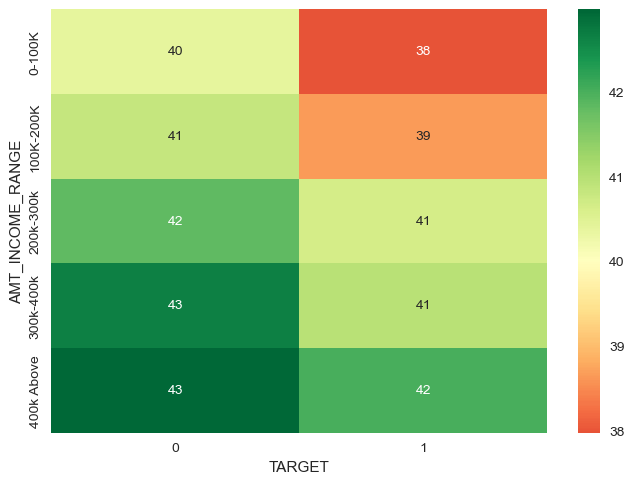

In [591]:
heat_map(loan_risk_analysis,'AMT_INCOME_RANGE','TARGET','AGE',40)

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

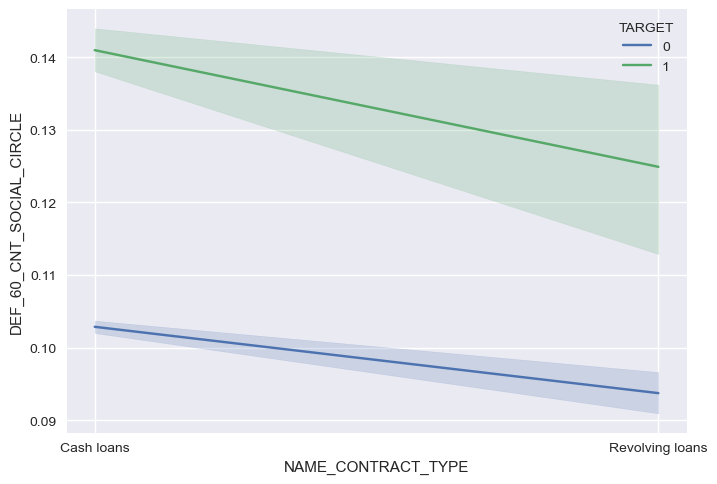

In [403]:
sns.lineplot(data=loan_risk_analysis,x='NAME_CONTRACT_TYPE',y='DEF_60_CNT_SOCIAL_CIRCLE',hue='TARGET')

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

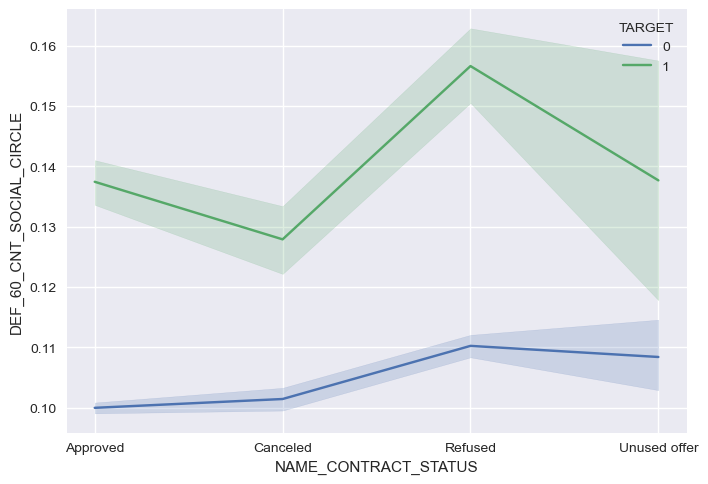

In [404]:
sns.lineplot(data=loan_risk_analysis,x='NAME_CONTRACT_STATUS',y='DEF_60_CNT_SOCIAL_CIRCLE',hue='TARGET')

<h1 align="left"> <font color='green'>Summary</font></h1>

- Data is highly imbalance. 
- **NAME_CONTRACT_STATUS and NAME_CONTRACT_STATUS** - Applicant's history, such as repeat customers and previously approved users, are more likely to have loans accepted for their current application.
- **AMT_INCOME** - Loans are most likely to be authorised for high-income clients.
- **AMT_CREDIT** - There is a strong link between a high income and a low credit range.
- **NAME_INCOME_TYPE** - Working-class clients have a higher likelihood of loan acceptance than non-working-class clients due to lower income.
- **CODE_GENDER:** Men have a higher default rate than women.
- **CNT_CHILDREN & CNT_FAM_MEMBERS:** The more members there are, the less likely they are to acquire a loan. 
- **NAME_EDUCATION_TYPE** - The higher the education, the better the chances of obtaining a loan.
- **DAYS_EMPLOYED** - If you have 0-20 years of experience, you have a decent probability of getting a loan.
- **DAYS_BIRTH** - Mean of age 40 with income range 200K - 300K have tend to no default case. 
- **REGION_RATING_CLIENT:** RATING 1 and 2 are the good clien region rating for loan acceptance.
- **DEF_60_CNT_SOCIAL_CIRCLE** - Having a average or higher social environment range of 0.14 reduces your chances of getting a loan.